# MODELO DE UM DIODO COM 5 PARÂMETROS

O modelo de um diodo, descrito em De Soto, Klein e Beckman (2006), consiste num circuito elétrico formado por uma fonte de corrente em paralelo com um diodo, e duas resistências, uma em série, e outra em paralelo, que reproduz o comportamento de uma célula fotovoltaica.

<img src="modelo_villalva.png" alt="Modelo Villalva" width="600" height="400">

Matematicamente pode ser expresso por

<font size="4"> $ I = I_{ph} - I_o [  e^{\frac{(V+IR_s)}{nV_t}} - 1 ] - \frac{V + IR_s}{Rp} $ </font>

em que   
  
- $I_{ph}$ é a corrente gerada pelo efeito fotoelétrico (photocorrente), diretamente proporcional a irradiância solar;
                                                                                                                               
                                                                                                                                   
- $I_o$ é a corrente de saturação reversa do diodo;

  
- $V_t = \frac{kT_{c}}{q}$ é a tensão térmica do diodo , sendo $k$ a constante de Bolztmann (1.381e-23 J/K), $q$ a carga do elétron (1.602e-19 C) e $T_c$ a temperatura da célula;                           

- $n$ é o fator de idealidade do diodo, valor adimensional entre 1 e 2. Quando 1 representa um diodo ideal.                                                                                                                                    

No entanto, um painel fotovoltaico é uma arranjo de $N_s$ células em série e, de acordo com Ma, Yang e Lu (2014) e Villalva, Gazoli e Filho (2009), essa variável pode ser incorporada a equação anterior e o modelo de um diodo pode ser expresso conforme

<font size="4"> $ I = I_{ph} - I_o [  e^{ \frac{1}{nV_t} ( \frac{V}{N_s} + IR_s) } - 1 ] - \frac{1}{Rp} (  \frac{V}{N_s} + IR_s ) $ </font>

A saída do modelo consiste nos valores de I (corrente) e V (tensão), que permitem a reprodução da curva I-V do painel.

A temperatura de operação da célula fotovoltaica pode ser estimada a partir da Temperatura Nominal de Operação da Célula (NOCT, *Nominal Operating Cell Temperature*).
O NOCT, que é informado pelo fabricante, é a temperatura que a célula fotovoltaica atinge quando opera com irradiância de 800 W/m² e temperatura ambiente de 20°C.
A relação entre a temperatura ambiente e a temperatura da célula fotovoltaica é dada por

$ T_{cell} = T_{amb} + \frac{(NOCT - 20)}{800} G$ 

   onde:                                                                                           

 - $T_{cell}$ é a temperatura estimada da célula, em graus Celsius (ºC);  

 - $T_{amb}$ é a temperatura ambiente, em graus Celsius (ºC);

-  $NOCT$ é a temperatura nominal de operação, em gruas Celsius (ºC);

 - $G$ é a irradiância solar incidente sobre o painel, em Watts por metro quadrado (W/m²)




In [1]:
# FUNÇÃO PARA ESTIMAR TEMPERATURA DA CÉLULA A PARTIR DO NOCT
#
# Argumentos da função:
# 
#   T_amb : temperatura ambiente, em ºC
#   G     : irradiância solar, em W/m²
#   NOCT  : valor NOCT, em ºC
#
#
# Retorno:
#
#   T_celula : temperatura estimada da célula em ºC
#

def estimar_temperatura_celula(T_amb, G, NOCT):
    
    T_celula = T_amb + (NOCT - 20)*G/800
    
    return T_celula


    
# FUNÇÃO PARA ESTIMAR A TEMPERATURA AMBIENTE A PARTIR DA TEMPERATURA DA CÉLULA

def estimar_temperatura_ambiente (T_cel, G, NOCT):

    T_amb = T_cel - (NOCT - 20)*G/800
    
    return T_amb


In [2]:
# FUNÇÃO MODELO DE UM DIODO COM 5 PARÂMETROS
#
# Argumentos da função:
#    
#       --> Condições meteorológicas
#               G : irradiância sobre o painel em W/m²
#               T : temperatura ambiente em ºC
#    
#       --> Parâmetros do modelo em STC:                
#           * os parâmetros devem ser passados em uma lista
#           exemplo: lista_de_param = [iph_ref, io_ref, Rs, Rp, n]
#
#               iph_ref : photocorrente referência, em Amperes [A]
#               io_ref  : corrente de saturação reversa do diodo, em Amperes [A]
#               Rs      : resistência série, em ohms
#               Rp      : resitência paralelo, em ohms
#               n       : fator de idealidade do diodo [entre 1 e 2]
#
#       --> Parâmetros experimentais fornecidos pelos fabricantes (parâmetros do datasheet), em STC
#          * devem ser passados em uma lista
#          exemplo: lista_dados_fabricante = [voc_ref, isc_ref, Kv, Ki, Ns]
#
#              voc_ref : tensão de circuito aberto em STC, em Volts [V]
#              isc_ref : corrente de curto circuito em STC, em Amperes [A]
#              Kv      : coeficiente de variação da tensão de circuito aberto
#                        em função da temperatura, em Volts/Kelvin [V/K]
#              Ki      : coeficiente de variação da corrente de curto circuito
#                        em função da temperatura, em Ampere/Kelvin [A/K]
#              Ns      : número de células em série do painel
#              NOCT    : Nominal Operating Cell Temperature, em graus Celsius [ºC]
#
#   ** STC - Standard Test Conditions = irradiância de 1000 W/m² e temperatura da célula igual a 25 ºC
#
#
#
# Retorno da função:
#
#       I    : vetor contendo valores da corrente de saída, em Amperes [A]
#       V    : vetor contendo valores da tensão de saída, em Volts [V]
#       P    : vetor contendo valores da potência de saída, em Watts [W]


def modelo_um_diodo (G, T, parametros, datasheet):

    import numpy as np
    from scipy.optimize import minimize_scalar

    iph_ref, io_ref, Rs, Rp, n = parametros
    voc_ref, isc_ref, Kv, Ki, Ns, NOCT = datasheet

    # Constantes
    k = 1.381e-23  # Constante de Boltzmann [J/K]
    q = 1.602e-19  # Carga do elétron [C]
    T_ref = 25 + 273.15 # Temperatura em STC [K]
    G_ref = 1000 # Irradiância em STC [W/m²]

    # Estima temperatura de operação das células
    t_cel = estimar_temperatura_celula (T, G, NOCT)
    T_cel = t_cel + 273.15 # Temperatura em Kelvin
    
    # Calculo de Vt
    Vt = Ns * k * T_cel / q

    # Atualiza valores de Voc e Isc em função da variação de temperatura
    voc = voc_ref + Kv*abs(T_cel-T_ref)
    isc = isc_ref + Ki*abs(T_cel-T_ref)

    # Atualiza valor de Iph em função da temperatura
    iph = (iph_ref + Ki*abs(T_cel - T_ref))*G/G_ref

    # Atualiza valor de I0 em função da temperatura
    Eg = 1.12 # eletron-Volt (eV)
    io = io_ref * (T_ref/T_cel)**3 * np.exp(q*Eg*(1/T_ref - 1/T_cel)/(n*k))

    # Função do modelo de um diodo de 5 parâmetros
    def func(I):
        return abs(iph - io * (np.exp((v + (Rs * I)) / (Vt*n)) - 1) - (v + Rs*I)/Rp - I)

    # Inicializa valores para o cálculo de I e V
    v = 0  # Início em V = 0
    step = 0.01  # Incremento dos valores de tensão
    limite_superior = isc
    criterio_de_parada = 0.05

    V = []
    I = []

    while True:
        # Calcula a corrente para a tensão atual
        Icalculado = minimize_scalar(func, bounds=(0, limite_superior), method='bounded').x
        V.append(v)
        I.append(Icalculado)
        
        if Icalculado <= criterio_de_parada:
            break

        v += step

    V = np.array(V)
    I = np.array(I)

    # Calcula a potência
    P = V*I
    
    return (I, V, P)
    

In [3]:
# FUNÇÃO PARA PLOTAR AS CURVAS I-V E P-V
#
# Argumentos:
#   
#      I : vetor contendo valores de corrente, em A
#      V : vetor contendo valores de tensão, em V
#      P : vetor contendo valores de potência, em W
#

def plotar_curvas(I, V, P):
    
    import matplotlib.pyplot as plt
    import numpy as np

    # Encontra os pontos principais das curvas
    circuito_aberto = (V[-1], I[-1])  # Último ponto na curva I-V (I=0)
    curto_circuito = (V[0], I[0])     # Primeiro ponto na curva I-V (V=0)
    indice_mpp = np.argmax(P)          # Índice do ponto de máxima potência
    mpp_iv = (V[indice_mpp], I[indice_mpp])  # Coordenadas MPP na curva I-V
    mpp_pv = (V[indice_mpp], P[indice_mpp])  # Coordenadas MPP na curva P-V

    plt.figure(figsize=(12, 6))

    # Curva I-V
    plt.subplot(1, 2, 1)
    plt.plot(V, I)
    plt.scatter(*circuito_aberto, color='green', label=f"Circuito Aberto ({V[-1]:.2f} V, {I[-1]:.2f} A)", zorder=5)
    plt.scatter(*curto_circuito, color='orange', label=f"Curto-Circuito ({V[0]:.2f} V, {I[0]:.2f} A)", zorder=5)
    plt.scatter(*mpp_iv, color='blue', label=f"MPP ({mpp_iv[0]:.2f} V, {mpp_iv[1]:.2f} A)", zorder=5)
    plt.xlabel("Tensão (V)")
    plt.ylabel("Corrente (A)")
    plt.title("Curva I-V")
    plt.grid(True)
    plt.legend()

    # Curva P-V
    plt.subplot(1, 2, 2)
    plt.plot(V, P, color='red')
    plt.scatter(*mpp_pv, color='blue', label=f"MPP ({mpp_pv[0]:.2f} V, {mpp_pv[1]:.2f} W)", zorder=5)
    plt.xlabel("Tensão (V)")
    plt.ylabel("Potência (P)")
    plt.title("Curva P-V")
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()


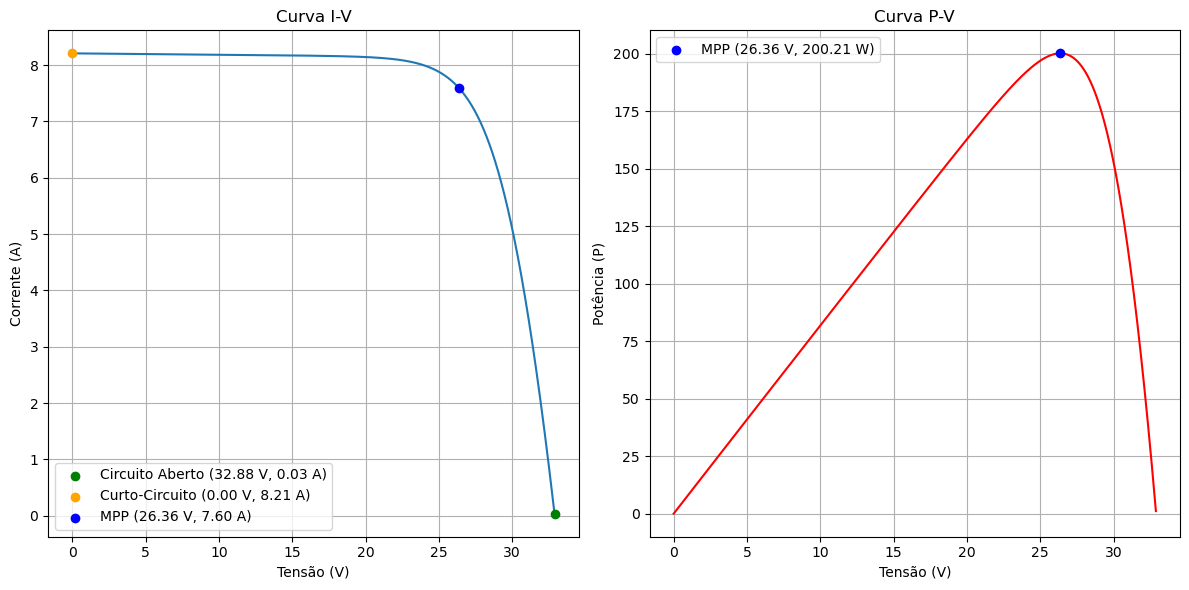

In [4]:
# EXEMPLO:
#
# Parametros estimados por Villalva, Gazoli e Filho (2009)
# para o Painel KC200GT, potência máxima em STC = 200.143 W
I_ph = 8.214 #[A]
I_o = 9.825e-8 #[A]
Rs = 0.221 # ohms
Rp = 415.405 # ohms
n = 1.3

parametros = [I_ph, I_o, Rs, Rp, n]

# Dados do datasheet do painel
V_oc = 32.9 # V
I_sc = 8.21 # A
Kv = -0.123 # V/K
Ki = 0.0032 # A/K
Ns = 54 
NOCT = 47 # ºC

data_sheet = [V_oc, I_sc, Kv, Ki, Ns,NOCT]

# Condições meteorológicas
# em STC
G = 1000 # W/m²
temp_celula = 25 # ºC

T = estimar_temperatura_ambiente(temp_celula, G, NOCT) # ºC
                                 

I, V, P = modelo_um_diodo (G, T, parametros, data_sheet)

plotar_curvas(I, V, P)


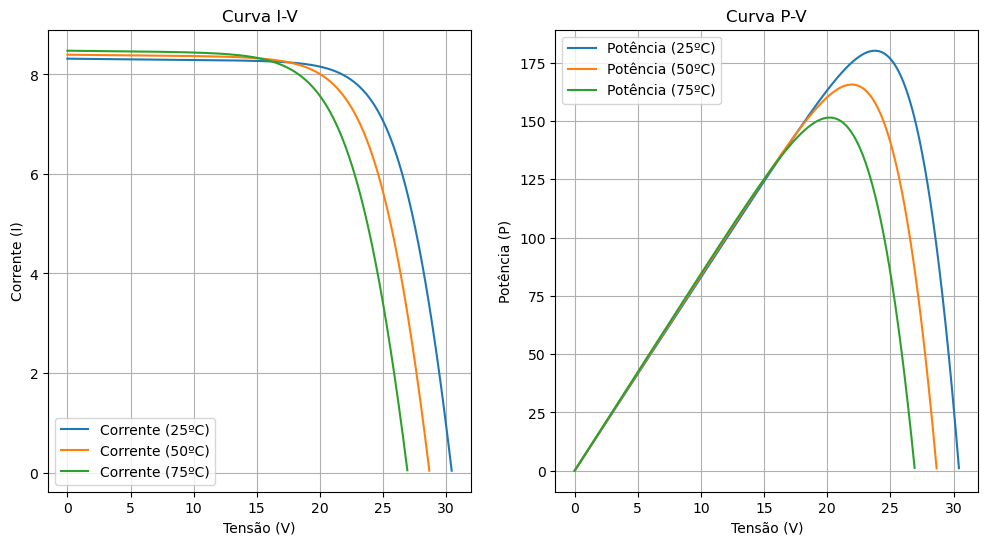

In [5]:
# Gerando curvas I-V para o mesmo painel em diferentes temperaturas

import matplotlib.pyplot as plt

num_curvas = 4
temperaturas = [25, 50, 75]

# Criar o gráfico
plt.figure(figsize=(12, 6))

for t in temperaturas:
    
    I, V, P = modelo_um_diodo (G, t, parametros, data_sheet)

    # Curva I-V
    plt.subplot(1, 2, 1)
    plt.plot(V, I, label=f"Corrente ({t}ºC)")
    plt.xlabel("Tensão (V)")
    plt.ylabel("Corrente (I)")
    plt.title("Curva I-V")
    plt.grid(True)
    plt.legend()

    # Curva P-V
    plt.subplot(1, 2, 2)
    plt.plot(V, P, label=f"Potência ({t}ºC)")
    plt.xlabel("Tensão (V)")
    plt.ylabel("Potência (P)")
    plt.title("Curva P-V")
    plt.grid(True)
    plt.legend()

plt.show()

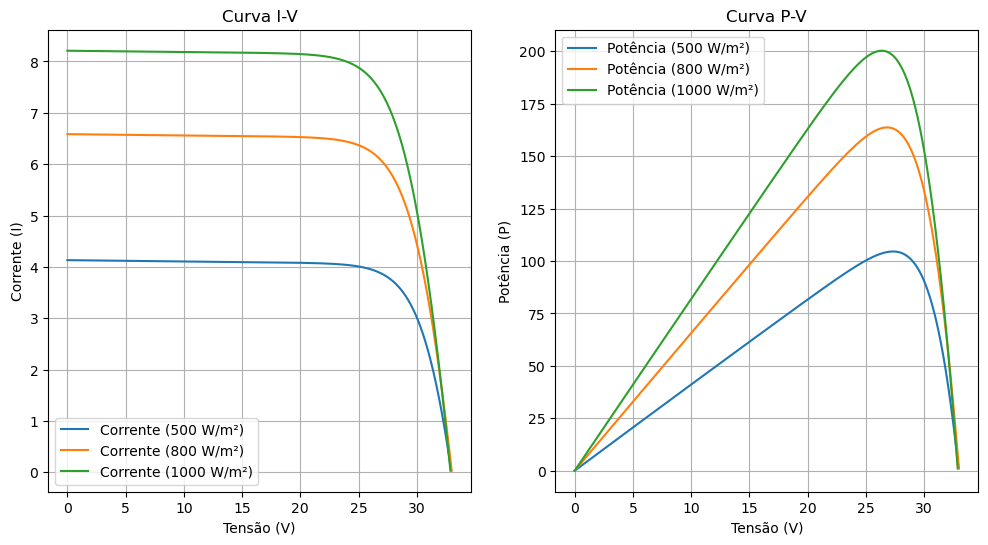

In [6]:
# Gerando curvas I-V para o mesmo painel em diferentes irradiâncias

import matplotlib.pyplot as plt

num_curvas = 4
irradiancias = [500, 800, 1000]

# Criar o gráfico
plt.figure(figsize=(12, 6))

for G in irradiancias:
    
    I, V, P = modelo_um_diodo (G, T, parametros, data_sheet)

    # Curva I-V
    plt.subplot(1, 2, 1)
    plt.plot(V, I, label=f"Corrente ({G} W/m²)")
    plt.xlabel("Tensão (V)")
    plt.ylabel("Corrente (I)")
    plt.title("Curva I-V")
    plt.grid(True)
    plt.legend()

    # Curva P-V
    plt.subplot(1, 2, 2)
    plt.plot(V, P, label=f"Potência ({G} W/m²)")
    plt.xlabel("Tensão (V)")
    plt.ylabel("Potência (P)")
    plt.title("Curva P-V")
    plt.grid(True)
    plt.legend()

plt.show()

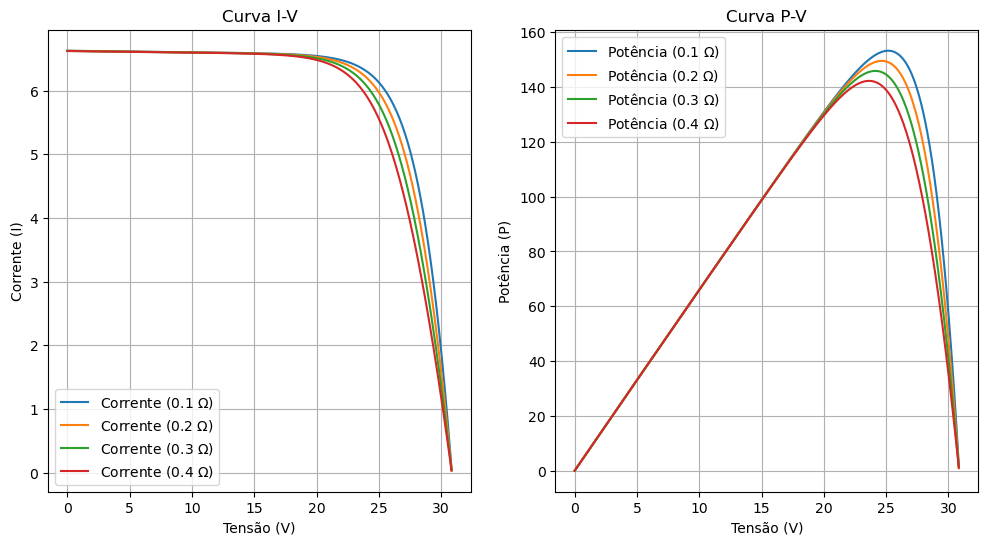

In [7]:
# Gerando curvas I-V para o mesmo painel com diferentes valores de Rs

import matplotlib.pyplot as plt

num_curvas = 4
lista_de_parametros = [[I_ph, I_o, 0.10  , Rp, n],
                       [I_ph, I_o, 0.20  , Rp, n],
                       [I_ph, I_o, 0.30  , Rp, n],
                       [I_ph, I_o, 0.40  , Rp, n],
                      ]

T = 20
G = 800


# Criar o gráfico
plt.figure(figsize=(12, 6))

for parametros in lista_de_parametros:
    
    I, V, P = modelo_um_diodo (G, T, parametros, data_sheet)

    # Curva I-V
    plt.subplot(1, 2, 1)
    plt.plot(V, I, label=f"Corrente ({parametros[2]} $\\Omega$)")
    plt.xlabel("Tensão (V)")
    plt.ylabel("Corrente (I)")
    plt.title("Curva I-V")
    plt.grid(True)
    plt.legend()

    # Curva P-V
    plt.subplot(1, 2, 2)
    plt.plot(V, P, label=f"Potência ({parametros[2]} $\\Omega$)")
    plt.xlabel("Tensão (V)")
    plt.ylabel("Potência (P)")
    plt.title("Curva P-V")
    plt.grid(True)
    plt.legend()

plt.show()

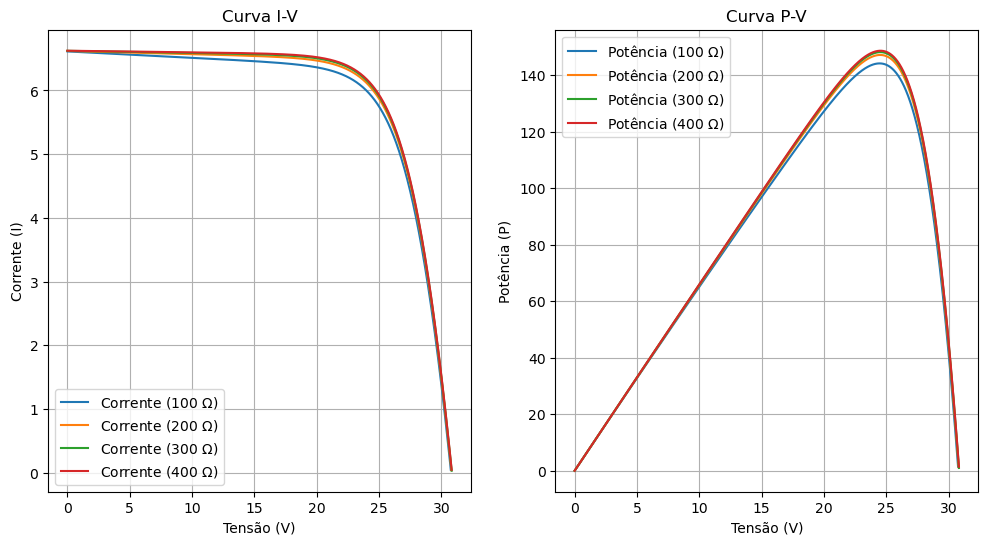

In [8]:
# Gerando curvas I-V para o mesmo painel com diferentes valores de Rp

import matplotlib.pyplot as plt

num_curvas = 4
lista_de_parametros = [[I_ph, I_o, Rs, 100, n],
                       [I_ph, I_o, Rs, 200, n],
                       [I_ph, I_o, Rs, 300, n],
                       [I_ph, I_o, Rs, 400, n],
                      ]

T = 20
G = 800

# Criar o gráfico
plt.figure(figsize=(12, 6))

for parametros in lista_de_parametros:
    
    I, V, P = modelo_um_diodo (G, T, parametros, data_sheet)

    # Curva I-V
    plt.subplot(1, 2, 1)
    plt.plot(V, I, label=f"Corrente ({parametros[3]} $\\Omega$)")
    plt.xlabel("Tensão (V)")
    plt.ylabel("Corrente (I)")
    plt.title("Curva I-V")
    plt.grid(True)
    plt.legend()

    # Curva P-V
    plt.subplot(1, 2, 2)
    plt.plot(V, P, label=f"Potência ({parametros[3]} $\\Omega$)")
    plt.xlabel("Tensão (V)")
    plt.ylabel("Potência (P)")
    plt.title("Curva P-V")
    plt.grid(True)
    plt.legend()

plt.show()

No entanto, os únicos dados fornecidos pelos fabricantes são:  
  
  - Voc : tensão de circuito aberto
    
  - Isc : corrente de curto circuito

  - Vmp : tensão no ponto de máxima potência (MPP)

  - Imp : corrente no ponto de máxima potência
    
    
obtidos de forma experimental com o painel submetido as condições padrões de testes STC, isto é:  

  - irradiância de 1000 W/m²
    
  - temperatura das células em ºC
    

É necessário alguma metodologia para estimar os parâmetros desconhecidos (Iph, Io, n, Rs e Rp).

Em Villalva, Gazoli e Filho (2009), o fator de idealidade do diodo 'n' é arbitrado, enquanto a corrente de saturação reversa do diodo 'Io' é estimada de forma analítica, assumindo que a corrente de curto-circuito 'Isc' é aproximadamente igual à corrente fotogerada 'Iph'.

Posteriormente, utiliza-se um método iterativo para determinar o par (Rs,Rp) que proporciona o melhor ajuste entre a curva I-V simulada e os três principais pontos de operação especificados pelo fabricante: tensão de circuito aberto, corrente de curto-circuito e ponto de máxima potência.

<img src="metodo_villalva.jpg" alt="Modelo Villalva" width="400" height="200">
    

In [9]:
# FUNÇÃO PARA ESTIMAR OS PARÂMETROS DESCONHECIDOS - MÉTODO DE VILLALVA, GAZOLI E FILHO (2009)
# 
# Argumentos:
#      
#        V_oc : tensão de circuito aberto em STC [V]
#        I_sc : corrente de curto circuito em STC [A]
#        V_mp : tensão no ponto de máxima potência em STC [V]
#        I_mp : corrente no ponto de máxima potência em STC [A]
#        Ns   : número de células do painel
#        NOCT : Nominal Operating Cell Temperature [ºC] 
#        Kv   : coeficiente de variação da tensão de circuito aberto em função da temperatura [V/K]
#        Ki   : coeficiente de variação da corrente de curto circuito em função da temperatura [A/K]
#        n    : fator de idealidade, entre 1 e 2 (1 para diodo ideal)
#        tol  : tolerância do processo de iteração
#        incr : incremento de Rs a cada iteração
#
# 
# Retorno:
#        I0        : corrente de saturação reversa do diodo estimada [A]
#        Iph       : photocorrente estimada [A]
#        Rs        : resistência série estimada [ohm]
#        Rp        : resistência paralela estimada [ohm]
#        registros : dicionario que armazena os valores calculados durante o processo iterativo
#        mensagem  : retorna informações sobre o processo de iteração
#
#

def estimar_parametros (V_oc, I_sc, V_mp, I_mp, Ns, NOCT, Kv, Ki, n, tol, incr):

    import time
    import numpy as np

    # Cria dicionários para armazenar os valores calculados
    # no transcorrer do processo de iteração
    registros = {
        "Rs" : [],
        "Rp" : [],
        "Iph" : [],
        "Pmax" : [],
        "erro" : [],
        "I" : [],
        "V" : [],
        "P" : [],
        }

    # Constantes
    k = 1.381e-23  # Constante de Boltzmann [J/K]
    q = 1.602e-19  # Carga do elétron [C]
    T_ref = 25 + 273.15 # temperatura do painel em STC [K]
    G_ref = 1000 # irradiância em STC [W/m²]

    # Temperatura ambiente com base no NOCT
    T_amb = estimar_temperatura_ambiente (25, G_ref, NOCT)
    
    # Calculo de Vt
    Vt = k*T_ref/q
    
    # Cálculo de Io - equação 7
    I0 = I_sc / (np.exp(V_oc/(n*Vt*Ns)) - 1) 
    
    # Estimativa inicial de Rp - equação 11    
    Rp = V_mp/(I_sc - I_mp) - (V_oc - V_mp)/I_mp
    registros["Rp"].append(Rp)
    
    # Valor inicial de Rs
    Rs = 0
    registros["Rs"].append(Rs)

    # Inicia contagem de tempo
    inicio = time.perf_counter()
    
    while True:
        # Calculo da fotocorrente    
        Iph = (Rp + Rs)*I_sc/Rp
        
        # Atualiza Rp - equação 9
        Rp = (V_mp * (V_mp + I_mp * Rs)) / (
              V_mp * Iph - V_mp * I0 * np.exp((V_mp + I_mp * Rs) * q / (Ns * n * k * T_ref)) 
            + V_mp * I0 
            - I_mp * V_mp
            )

        if Rp < 0:
            mensagem = "\n O processo de iteração foi interrompido porque Rp resultou em um valor negativo \n" \
                       "\n Verificar valores de 'incremento do Rs' e 'tolerância' \n \n"
            break
            
        parametros = [I_ph, I_o, Rs, Rp, n]
        data_sheet = [V_oc, I_sc, Kv, Ki, Ns, NOCT]
 
        # Gera curva com os parâmetros calculados
        I, V, P = modelo_um_diodo(G_ref, T_amb , parametros, data_sheet)
        
        # Verifica a máxima potência
        Pmax = max(P)
        
        # Calcula o erro
        erro = abs(Pmax - I_mp*V_mp)
        
        # Verifica se erro não esta aumentando demasiadamente
        if erro > 100 :
            mensagem = "\n Erro aumentou demasiadamente \n" \
                       "\n Verificar incremento de Rs e tolerância \n\n"  
            break
        
        # Verifica condição
        if erro < tol : 
            # Encerra contagem de tempo
            fim = time.perf_counter()
            
            # Calcula tempo de execução
            tempo_execucao = fim - inicio

            mensagem = "\nO processo iterativo foi concluido \n\n" \
                       f"Tempo de execução : {tempo_execucao/60:.2f} minutos \n"
            break
        
        # Incrementa Rs            
        Rs+=incr
        
        # Armazena valores
        registros["Rs"].append(Rs)
        registros["Rp"].append(Rp)
        registros["Iph"].append(Iph)
        registros["I"].append(I)
        registros["V"].append(V)
        registros["P"].append(P)
        registros["erro"].append(erro)
        registros["Pmax"].append(Pmax)
        
    
    
    return (I0, Iph, Rs, Rp, registros, mensagem)


In [10]:
# Dados do Painel KC200GT
# potência máxima em STC = 200.143 W

V_oc = 32.9 # V
I_sc = 8.21 # A
Kv = -0.123 # V/K
Ki = 0.0032 # A/K
Ns = 54 
NOCT = 47 # ºC
V_mp = 26.3
I_mp = 7.61
n=1.3 # valor arbitrado
# Pmáx = I_mp x V_mp = 200.143 W

# Tolerancia
tol = 0.1
# Incremento de Rs
incr=0.001

parametros = estimar_parametros (V_oc, I_sc, V_mp, I_mp, Ns, NOCT, Kv, Ki, n, tol, incr)
                                
I0, Iph, Rs, Rp, registros, msg = parametros

print(msg)

from tabulate import tabulate
# Mostra resultados
dados = [
    ["Parâmetro", "Valor"],
    ["I0", f"{I0:.3} A"],
    ["Iph", f"{Iph:.3f} A"],
    ["Rs", f"{Rs:.3f} \u03A9"],
    ["Rp", f"{Rp:.3f} \u03A9"],
    ["Pmáx", f"{registros["Pmax"][-1]:.3f} W"],
]

print(tabulate(dados, headers="firstrow", tablefmt="grid"))



O processo iterativo foi concluido 

Tempo de execução : 3.44 minutos 

+-------------+------------+
| Parâmetro   | Valor      |
+=============+============+
| I0          | 9.89e-08 A |
+-------------+------------+
| Iph         | 8.218 A    |
+-------------+------------+
| Rs          | 0.193 Ω    |
+-------------+------------+
| Rp          | 214.033 Ω  |
+-------------+------------+
| Pmáx        | 200.243 W  |
+-------------+------------+


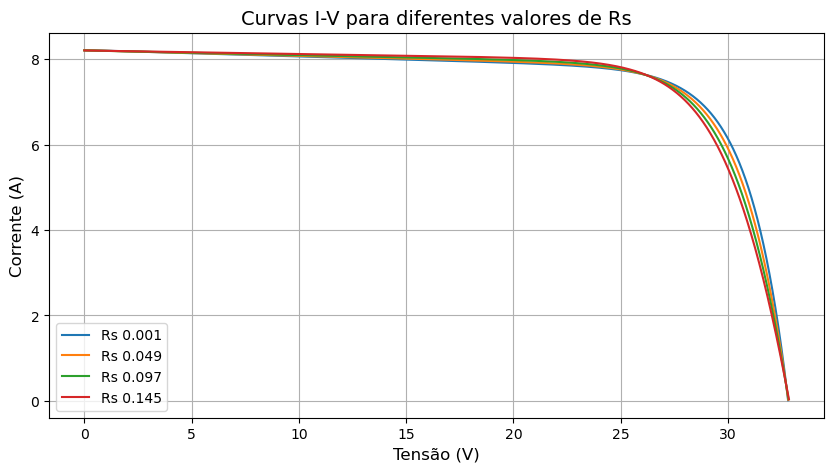

In [11]:
# Mostra curvas I-V geradas durante o processo de iteração

import matplotlib.pyplot as plt

num_curvas = 4
passo = len(registros["V"]) // num_curvas
indices = []

# Gerar índices equidistantes
for i in range(num_curvas):
    indices.append(i * passo)

# Cria gráfico
plt.figure(figsize=(10, 5))  

# Plota as curvas selecionadas
for i in indices:
    plt.plot(registros["V"][i], registros["I"][i], label=f"Rs {registros["Rs"][i+1]:.3f}")
    
# Personalização do gráfico
plt.title("Curvas I-V para diferentes valores de Rs", fontsize=14)
plt.xlabel("Tensão (V)", fontsize=12)
plt.ylabel("Corrente (A)", fontsize=12)
plt.legend()  # Adiciona a legenda para identificar as curvas
plt.grid(True)  # Adiciona uma grade para facilitar a leitura
plt.show()

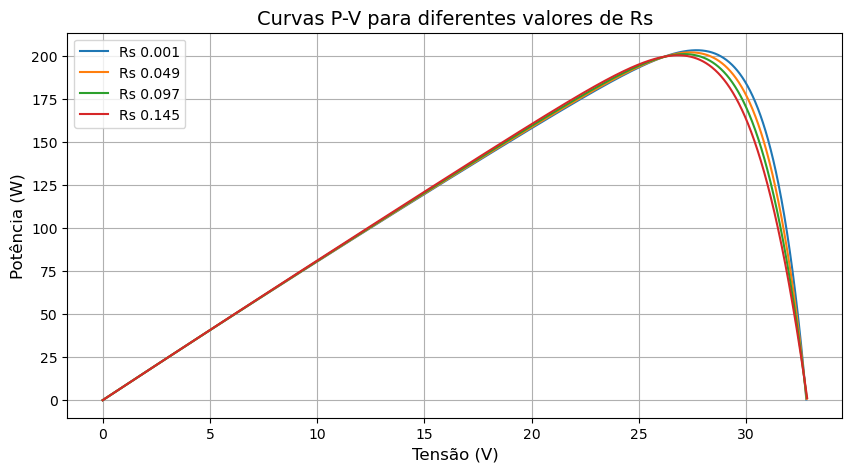

In [12]:
# Mostra curvas P-V geradas durante o processo de iteração

import matplotlib.pyplot as plt

num_curvas = 4
passo = len(registros["V"]) // num_curvas
indices = []

# Gerar índices equidistantes
for i in range(num_curvas):
    indices.append(i * passo)

# Cria gráfico
plt.figure(figsize=(10, 5))  

# Plota as curvas selecionadas
for i in indices:
    plt.plot(registros["V"][i], registros["P"][i], label=f"Rs {registros["Rs"][i+1]:.3f}")
    
# Personalização do gráfico
plt.title("Curvas P-V para diferentes valores de Rs", fontsize=14)
plt.xlabel("Tensão (V)", fontsize=12)
plt.ylabel("Potência (W)", fontsize=12)
plt.legend()  # Adiciona a legenda para identificar as curvas
plt.grid(True)  # Adiciona uma grade para facilitar a leitura
plt.show()

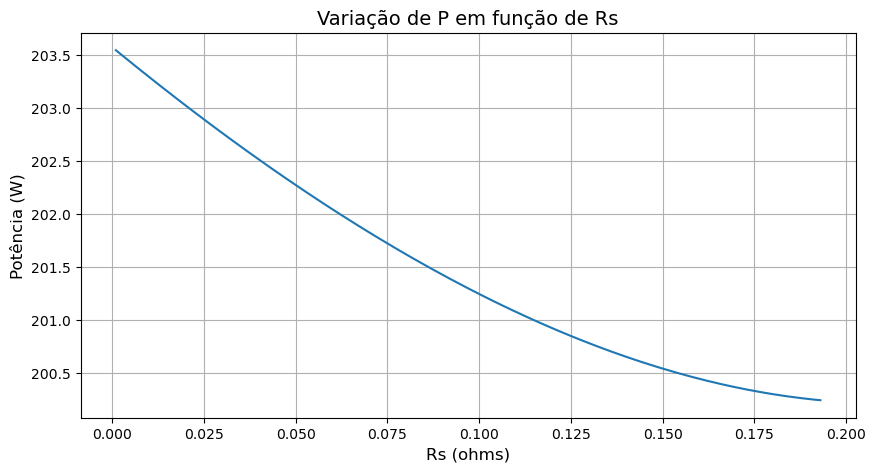

In [18]:
# Mostra variação de P em função do aumento de Rs

import matplotlib.pyplot as plt

# Cria gráfico
plt.figure(figsize=(10, 5))  
plt.plot(registros["Rs"][1:], registros["Pmax"])
    
# Personalização do gráfico
plt.title("Variação de P em função de Rs", fontsize=14)
plt.xlabel("Rs (ohms)", fontsize=12)
plt.ylabel("Potência (W)", fontsize=12)
plt.grid(True)  # Adiciona uma grade para facilitar a leitura
plt.show()